<a href="https://colab.research.google.com/github/irshandyaditya/PCVK_Ganjil_2024/blob/Week-7/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Irshandy Aditya Wicaksana**
# TI - 3A / 16 - 2241720148
Modul **7**

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:  
*   Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.
*   Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

* Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

In [3]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padding_height, padding_width = image.shape

  output_height = (padding_height - kernel_height) // stride + 1
  output_width = (padding_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

* Load citra yang akan diproses dan ubah menjadi citra keabuan


In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

* Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

In [5]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

* Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:


In [6]:
convolution2d(img_gray, kernel_sharpen, 1, 2)

array([[   0.,  -47.,  -42., ..., -134., -131.,    0.],
       [ -47.,  145.,   75., ...,  273.,  385., -131.],
       [ -48.,  105.,   47., ...,  131.,  287., -136.],
       ...,
       [  -9.,   11.,   15., ...,   98.,  227., -102.],
       [ -18.,   64.,   40., ...,  130.,  305.,  -96.],
       [   0.,  -18.,  -17., ...,  -73.,  -96.,    0.]], dtype=float32)

Memanggil Fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan

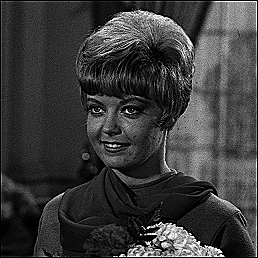

In [7]:
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

In [8]:
# Sharpen Filter
kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
result_sharpen = convolution2d(img_gray, kernel_sharpen, 1, 1)

# Emboss Filter
kernel_emboss = np.array([[-2, -1,  0],
                          [-1,  1,  1],
                          [ 0,  1,  2]])
result_emboss = convolution2d(img_gray, kernel_emboss, 1, 1)

# Left Sobel Edge Detection
kernel_sobel_left = np.array([[ 1,  0, -1],
                              [ 2,  0, -2],
                              [ 1,  0, -1]])
result_sobel_left = convolution2d(img_gray, kernel_sobel_left, 1, 1)

# Canny Edge Detection (approximation)
kernel_canny = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])
result_canny = convolution2d(img_gray, kernel_canny, 1, 1)

# Prewitt Edge Detection
kernel_prewitt = np.array([[-1, -1, -1],
                           [ 0,  0,  0],
                           [ 1,  1,  1]])
result_prewitt = convolution2d(img_gray, kernel_prewitt, 1, 1)

# 5x5 Gaussian Blur
kernel_gaussian_5x5 = np.array([[1,  4,  6,  4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1,  4,  6,  4, 1]]) / 256
result_gaussian_5x5 = convolution2d(img_gray, kernel_gaussian_5x5, 1, 2)

# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel_21x21 = gaussian_kernel @ gaussian_kernel.T
result_gaussian_21x21 = convolution2d(img_gray, gauss_kernel_21x21, 1, 10)

Sharpen Filter: Menggunakan kernel penajaman (kernel_sharpen) untuk meningkatkan detail gambar.

Emboss Filter: Menggunakan kernel embos (kernel_emboss) yang memberi efek bayangan 3D pada gambar.

Left Sobel Edge Detection: Mendeteksi tepi gambar secara horizontal menggunakan kernel Sobel kiri (kernel_sobel_left).

Canny Edge Detection (Approximation): Mendeteksi tepi gambar menggunakan kernel yang menyerupai Canny Edge Detection (kernel_canny).

Prewitt Edge Detection: Mendeteksi tepi gambar menggunakan kernel Prewitt (kernel_prewitt), fokus pada tepi vertikal.

5x5 Gaussian Blur: Menggunakan kernel Gaussian untuk mereduksi noise dengan ukuran kernel 5x5 (kernel_gaussian_5x5).

21x21 Gaussian Blur: Menggunakan kernel Gaussian dengan ukuran 21x21 (gauss_kernel_21x21) untuk efek blur yang lebih kuat.

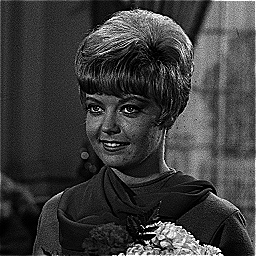

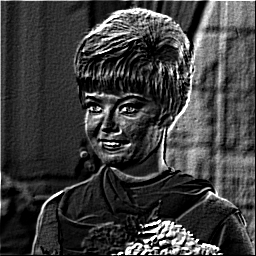

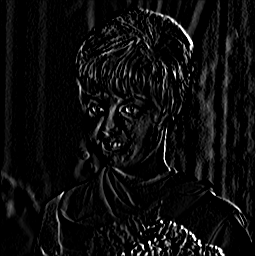

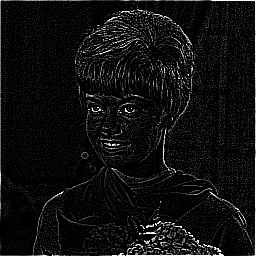

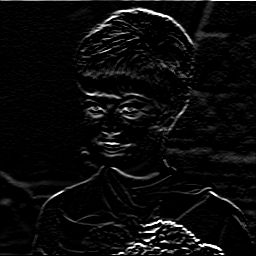

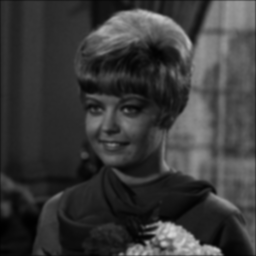

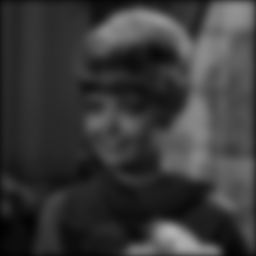

In [9]:
cv2_imshow(result_sharpen)
cv2_imshow(result_emboss)
cv2_imshow(result_sobel_left)
cv2_imshow(result_canny)
cv2_imshow(result_prewitt)
cv2_imshow(result_gaussian_5x5)
cv2_imshow(result_gaussian_21x21)

cv2_imshow(result_sharpen) menampilkan gambar dengan efek penajaman.

cv2_imshow(result_emboss) menampilkan gambar dengan efek embos (bayangan 3D).

cv2_imshow(result_sobel_left) menampilkan hasil deteksi tepi menggunakan filter Sobel kiri.

cv2_imshow(result_canny) menampilkan hasil deteksi tepi dengan filter yang menyerupai Canny.

cv2_imshow(result_prewitt) menampilkan hasil deteksi tepi menggunakan filter Prewitt.

cv2_imshow(result_gaussian_5x5) menampilkan gambar dengan efek blur menggunakan kernel Gaussian 5x5.

cv2_imshow(result_gaussian_21x21) menampilkan gambar dengan efek blur menggunakan kernel Gaussian 21x21.